<div><span style="background-color: #9e4244; padding-top: 80px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 22px; font-weight: bold">Session 1: Introduction to Credit Card Fraud Analysis</span></div>

<div class="alert alert-danger alert-info">
     In this notebook we will be having an overview of the credit card fraud dataset. Specifically, the topics covered are as follows:<br>
    <ol>
        <li> Exploratory Data Analysis</li>
        <li>Cleaning and Pre-processing</li>
        <li>Baselining</li>
        <li><i>Exercise: Generting Insights thru EDA</i></li>
    </ol>
</div>

In [9]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Data Cleaning and Preprocessing </span></div>

In [11]:
pd.set_option('display.max_columns', None)
cc_fraud = pd.read_excel('sprint_dataset.xlsx')
cc_fraud['full_name'] = cc_fraud['first'] + ' ' + cc_fraud['last']
print(cc_fraud.shape)
cc_fraud.head()

(200000, 26)


,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,full_name
0,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,b7e590b6def607cf89d91a9909985b82,2021-02-13,22:39:49,1613255989,misc_net,825.04,1,MedStoreRx,9.265518,123.368859,Harry Mckee
1,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,d248c10143858b069bb776065646ac48,2021-02-12,23:01:09,1613170869,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292,Harry Mckee
2,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,a4fb2e02583977d4afc46b09506611f8,2021-02-12,14:45:57,1613141157,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767,Harry Mckee
3,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,f315ea3abc262b459360f62bd3619c12,2021-02-12,23:08:59,1613171339,shopping_net,919.50,1,Zalora,10.606020,123.930862,Harry Mckee
4,8013-2690062-6,4895039978433570,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,123.85,105051,Planning and development surveyor,1960-08-31,165239342778,ac3503258c2fff1c16a381d3633b1e0d,2021-02-13,22:56:43,1613257003,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528,Harry Mckee


In [12]:
cc_fraud['ssn'].value_counts()

4177-6865207-1    2125
8563-6400345-3    2124
5136-0385406-7    2123
7948-2503280-6    2123
6992-9962634-9    2123
                  ... 
5158-9450907-8       7
5654-5060347-1       7
8314-2736211-7       7
2016-7610086-4       7
0631-9472883-9       7
Name: ssn, Length: 189, dtype: int64

### 1. Drop Unnecessary Variables

In [13]:
to_drop = ['cc_num', 'first', 'last', 'street', 'state', 'zip', 'acct_num', 'trans_num', 'unix_time', 'full_name']
cc_clean = cc_fraud.drop(to_drop, axis=1)
cc_clean.head()

,ssn,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:39:49,misc_net,825.04,1,MedStoreRx,9.265518,123.368859
1,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:01:09,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292
2,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,14:45:57,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767
3,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:08:59,shopping_net,919.50,1,Zalora,10.606020,123.930862
4,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:56:43,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528


### 2. Clean Date and Time

In [24]:
cc_clean.dtypes

ssn                       object
gender                    object
city                      object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob               datetime64[ns]
trans_date                object
trans_time                object
category                  object
amt                      float64
is_fraud                   int64
merchant                  object
merch_lat                float64
merch_long               float64
trans_datetime    datetime64[ns]
trans_year                object
trans_month                int64
trans_day                  int64
trans_wday                object
dtype: object

In [31]:
cc_clean['trans_year'] = cc_clean['trans_year'].astype(str)
cc_clean['trans_time'] = cc_clean['trans_time'].astype(str)

In [32]:
# pre-processing time
# transaction date
cc_clean['trans_datetime'] = pd.to_datetime(cc_clean['trans_date'])
cc_clean['trans_date'] = cc_clean['trans_datetime'].dt.date
cc_clean['trans_year'] = cc_clean['trans_datetime'].dt.year.astype(str)
cc_clean['trans_month'] = cc_clean['trans_datetime'].dt.month
cc_clean['trans_day'] = cc_clean['trans_datetime'].dt.day
cc_clean['trans_wday'] = pd.Series(cc_clean['trans_datetime']).dt.day_name()

# transaction time
# df['trans_hour'] = df['trans_time'].str[:2].astype(int)

cc_clean['trans_hour'] = cc_clean['trans_time'].str[:2].astype(str)
cc_clean['trans_hour'] = pd.to_numeric(cc_clean['trans_hour'])

# convert month to string
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
cc_clean['trans_month_'] = cc_clean['trans_month'].map(month_map)

# convert time to part of day
def get_part_of_day(hour):
    """Return the part of day given the hour of day"""
    if (hour > 22) or (hour <= 1):
        return 'late evening'
    elif hour <= 6:
        return 'early morning'
    elif hour <= 11:
        return 'late morning'
    elif hour <= 14:
        return 'midday'
    elif hour <= 18:
        return 'afternoon'
    else:
        return 'early evening'
    
# convert transaction type
def get_trans_type(trans):
    if (trans == 'misc_net') or (trans == 'shopping_net') or (trans == 'grocery_net'):
        return 'net'
    else:
        return 'others'
    
cc_clean.loc[:, 'part_of_day'] = cc_clean['trans_hour'].apply(get_part_of_day)
cc_clean.head(20)

,ssn,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_datetime,trans_year,trans_month,trans_day,trans_wday,trans_hour,trans_month_,part_of_day
0,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:39:49,misc_net,825.04,1,MedStoreRx,9.265518,123.368859,2021-02-13,2021,2,13,Saturday,22,Feb,early evening
1,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:01:09,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292,2021-02-12,2021,2,12,Friday,23,Feb,late evening
2,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-12,14:45:57,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767,2021-02-12,2021,2,12,Friday,14,Feb,midday
3,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:08:59,shopping_net,919.50,1,Zalora,10.606020,123.930862,2021-02-12,2021,2,12,Friday,23,Feb,late evening
4,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:56:43,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528,2021-02-13,2021,2,13,Saturday,22,Feb,early evening
5,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:35:23,misc_net,996.26,1,Decathlon,9.203337,124.753245,2021-02-13,2021,2,13,Saturday,22,Feb,early evening
6,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-13,23:24:17,shopping_net,923.63,1,Zalora,10.309144,123.055637,2021-02-13,2021,2,13,Saturday,23,Feb,late evening
7,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-13,15:02:37,shopping_net,987.61,1,eBay,10.286819,124.295683,2021-02-13,2021,2,13,Saturday,15,Feb,afternoon
8,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-13,23:21:41,shopping_pos,905.51,1,Marks and Spencer,10.591089,124.664513,2021-02-13,2021,2,13,Saturday,23,Feb,late evening
9,8013-2690062-6,M,Tagbilaran City,9.6500,123.8500,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:32:40,shopping_pos,901.05,1,Rustan Group,9.939093,124.291693,2021-02-12,2021,2,12,Friday,23,Feb,late evening


### 3. Age

In [33]:
cc_clean['dob_datetime'] = pd.to_datetime(cc_clean['dob'])
cc_clean['dob'] = cc_clean['dob_datetime'].dt.date
cc_clean['age'] = (cc_clean['trans_date'] - cc_clean['dob'])/365
cc_clean['age'] = cc_clean['age'].apply(lambda x: x.days)
cc_clean.head()

,ssn,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_datetime,trans_year,trans_month,trans_day,trans_wday,trans_hour,trans_month_,part_of_day,dob_datetime,age
0,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:39:49,misc_net,825.04,1,MedStoreRx,9.265518,123.368859,2021-02-13,2021,2,13,Saturday,22,Feb,early evening,1960-08-31,60
1,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:01:09,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292,2021-02-12,2021,2,12,Friday,23,Feb,late evening,1960-08-31,60
2,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,14:45:57,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767,2021-02-12,2021,2,12,Friday,14,Feb,midday,1960-08-31,60
3,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:08:59,shopping_net,919.50,1,Zalora,10.606020,123.930862,2021-02-12,2021,2,12,Friday,23,Feb,late evening,1960-08-31,60
4,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:56:43,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528,2021-02-13,2021,2,13,Saturday,22,Feb,early evening,1960-08-31,60


### 4. Retain final columns

In [36]:
to_drop2 = ['dob', 'trans_date', 'trans_time', 'trans_datetime', 'trans_month', 'trans_hour', 'dob_datetime']
cc_final = cc_clean.drop(to_drop2, axis=1)
cc_final.head()

,ssn,gender,city,lat,long,city_pop,job,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_year,trans_day,trans_wday,trans_month_,part_of_day,age
0,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,misc_net,825.04,1,MedStoreRx,9.265518,123.368859,2021,13,Saturday,Feb,early evening,60
1,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292,2021,12,Friday,Feb,late evening,60
2,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767,2021,12,Friday,Feb,midday,60
3,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,shopping_net,919.50,1,Zalora,10.606020,123.930862,2021,12,Friday,Feb,late evening,60
4,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528,2021,13,Saturday,Feb,early evening,60


In [37]:
cc_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ssn           200000 non-null  object 
 1   gender        200000 non-null  object 
 2   city          200000 non-null  object 
 3   lat           200000 non-null  float64
 4   long          200000 non-null  float64
 5   city_pop      200000 non-null  int64  
 6   job           200000 non-null  object 
 7   category      200000 non-null  object 
 8   amt           200000 non-null  float64
 9   is_fraud      200000 non-null  int64  
 10  merchant      200000 non-null  object 
 11  merch_lat     200000 non-null  float64
 12  merch_long    200000 non-null  float64
 13  trans_year    200000 non-null  object 
 14  trans_day     200000 non-null  int64  
 15  trans_wday    200000 non-null  object 
 16  trans_month_  200000 non-null  object 
 17  part_of_day   200000 non-null  object 
 18  age 

### 5. One-hot encode categorical variables

In [ ]:
# to_drop3 = []
# for col in tqdm(cc_final.columns):
#     if cc_final[col].dtype == 'O':
#         dummies = pd.get_dummies(cc_final[col], prefix=col, drop_first=False)
#         cc_final = pd.concat([cc_final, dummies], axis=1)
#         to_drop3.append(col)
# cc_final = cc_final.drop(to_drop3, axis=1)
# cc_final.head()

In [ ]:
# cc_final.to_csv('cc_df.csv', index=None)

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Exploratory Data Analysis </span></div>

In [67]:
cc_clean.describe()

,lat,long,city_pop,amt,is_fraud,merch_lat,merch_long,trans_month,trans_day,trans_hour,age
count,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,12.836680,122.156171,4.922793e+05,70.205819,0.008975,12.837277,122.154777,6.805620,15.626690,10.347835,64.416680
std,3.009466,1.785025,1.452450e+06,171.601519,0.094311,3.064447,1.875286,3.291983,8.899399,6.854706,11.163471
min,6.116700,118.750000,4.104100e+04,1.000000,0.000000,5.119448,117.755352,1.000000,1.000000,0.000000,49.000000
25%,10.250000,120.941700,1.338930e+05,8.700000,0.000000,10.213936,120.701837,4.000000,8.000000,4.750000,55.000000
50%,14.329400,121.125000,2.831570e+05,48.820000,0.000000,13.953511,121.535780,7.000000,16.000000,10.000000,63.000000
75%,14.683300,123.433300,4.116340e+05,85.410000,0.000000,15.026644,123.579867,10.000000,23.000000,16.000000,71.000000
max,18.200000,126.233300,2.308800e+07,18039.810000,1.000000,19.199625,127.232784,12.000000,31.000000,23.000000,96.000000


### Valid vs Fraud 

valid    198205
fraud      1795
Name: Class, dtype: int64

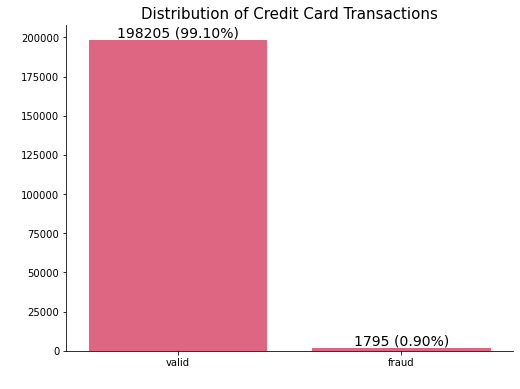

In [76]:
fraud_map = {0: 'valid', 1: 'fraud'}
cc_fraud_eda = cc_clean.copy()
cc_fraud_eda['Class'] = cc_fraud_eda['is_fraud'].map(fraud_map)

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x=cc_fraud_eda['Class'],
              order=cc_fraud_eda['Class'].value_counts().index,
              color="#F25278")
# abs_values = cc_fraud_eda['Class'].value_counts(ascending = False).values
rel_values = cc_fraud_eda['Class'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels=lbls, fontsize= 14)

ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Distribution of Credit Card Transactions', size=15, y=1)
display(cc_fraud_eda['Class'].value_counts())
plt.show()

### Age

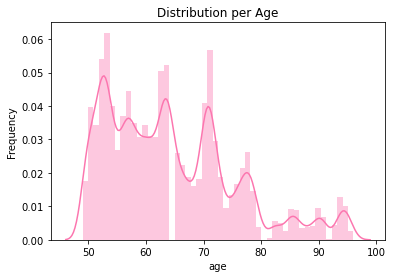

In [260]:
#check distribution of age
sns.distplot(cc_fraud_eda['age'], color = '#FC76AF')

plt.title('Distribution per Age')
plt.ylabel('Frequency')
plt.show()

In [92]:
#Distribution of transactions per age
cc_fraud_eda['age'].value_counts().sort_index(axis=0)

49     3311
50     7443
51     6477
52    10153
53    11637
54     7508
55     5020
56     6937
57     8342
58     6552
59     5781
60     6476
61     5833
62     5793
63     9484
64     9820
65     4896
66     4227
67     3508
68     3040
69     3402
70     7678
71    10645
72     5541
73     3538
74     1799
75     2499
76     3149
77     4053
78     4924
79     2763
80      734
81      119
82     1058
83      935
84      517
85     1743
86     1670
87      690
88      728
89      793
90     1805
91     1278
92       18
93      852
94     2395
95     1923
96      513
Name: age, dtype: int64

### Gender

Male    200000
Name: Gender_, dtype: int64

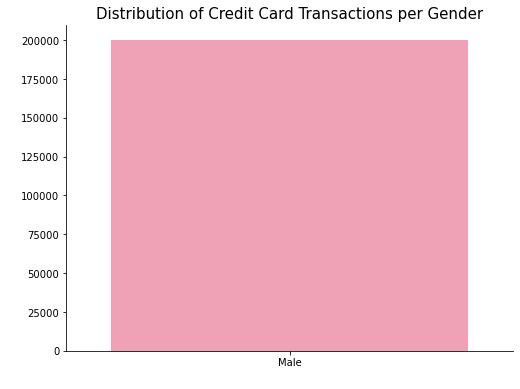

In [54]:
gender_map = {'M': 'Male', 'F': 'Female'}
cc_fraud_eda['Gender_'] = cc_fraud_eda['gender'].map(gender_map)

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x=cc_fraud_eda['Gender_'],
              order=cc_fraud_eda['Gender_'].value_counts().index,
              color="#FC94AF")
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Distribution of Credit Card Transactions per Gender', size=15, y=1)
display(cc_fraud_eda['Gender_'].value_counts())
plt.show()

### Location

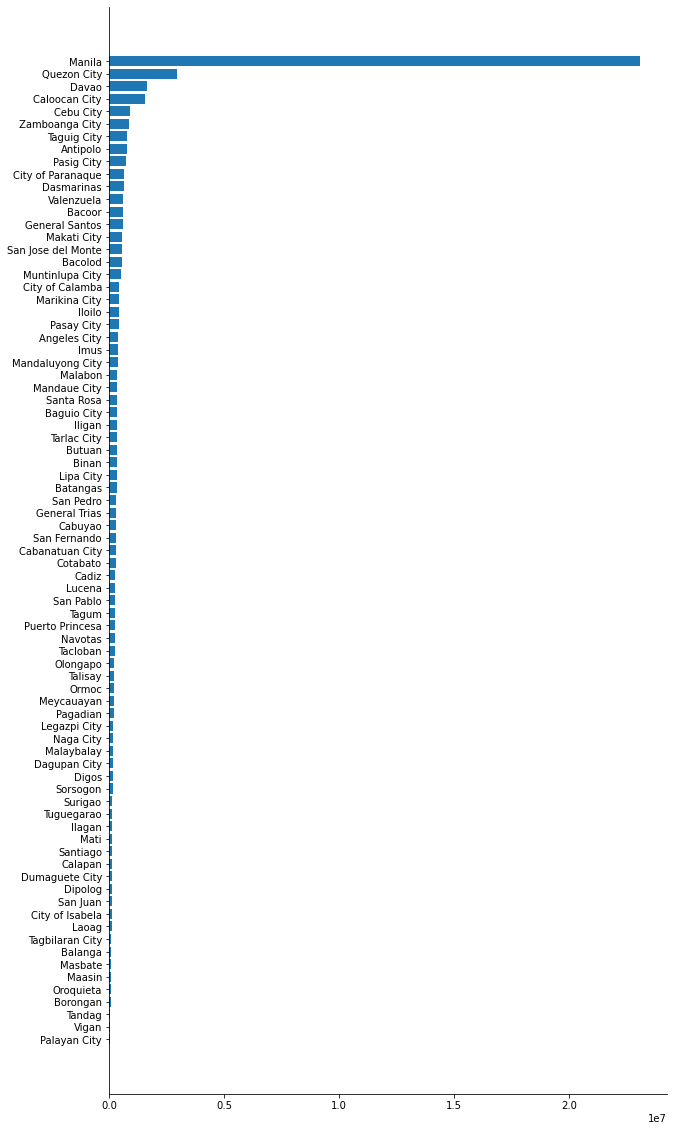

In [58]:
cc_city = cc_fraud_eda.drop_duplicates(subset=['city']).reset_index(drop=True).sort_values(['city_pop'])


fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(cc_city.city, cc_city.city_pop)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.show()

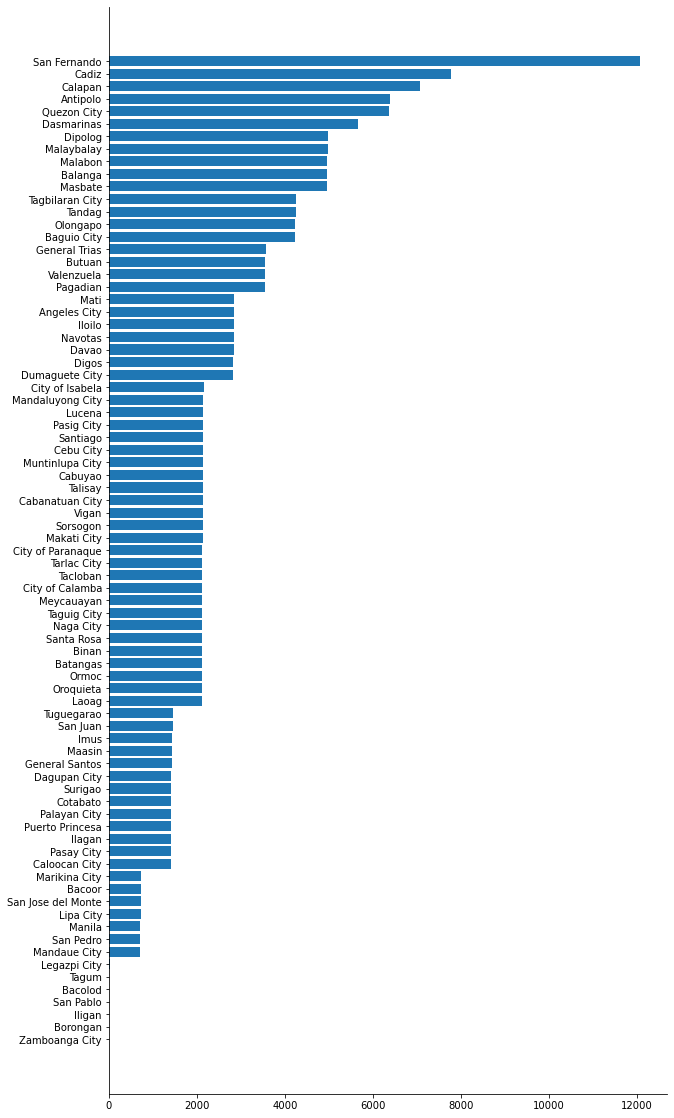

In [59]:
cc_city_2 = pd.DataFrame({'trans_count': cc_fraud_eda['city'].value_counts().sort_values()})

# colors_h = ['lightgray'] * 85
#  colors_h[-3:] = ['#ff0257'] * 3

fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(cc_city_2.index, cc_city_2.trans_count)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.show()

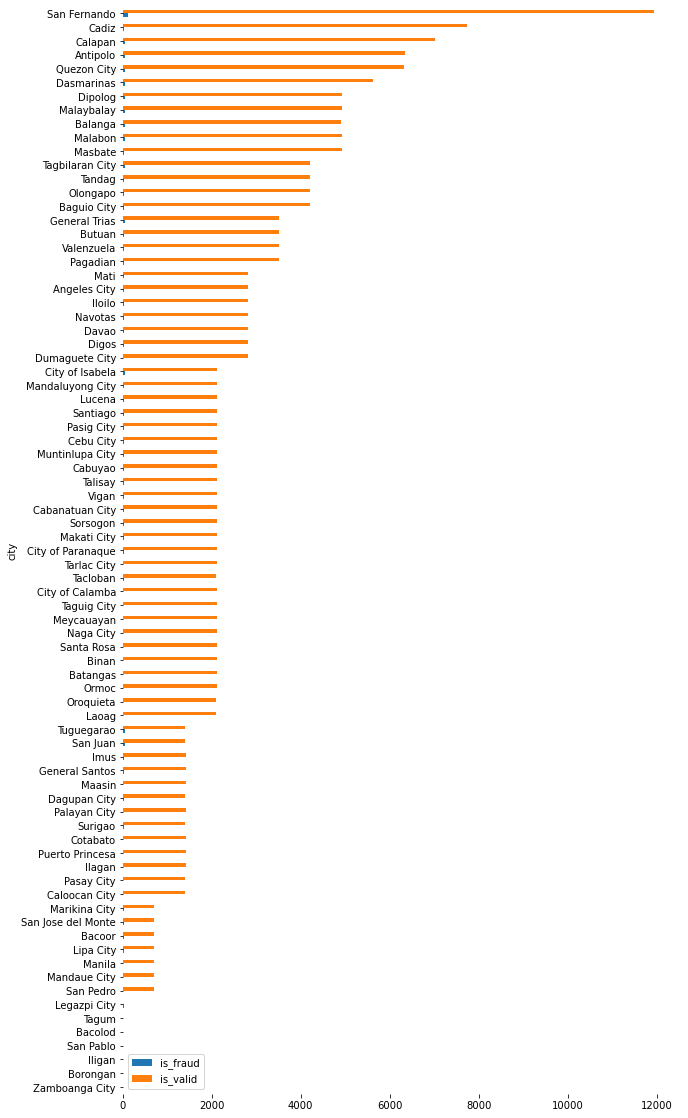

In [60]:
cc_city_3 = pd.DataFrame(cc_fraud_eda.groupby('city')['is_fraud'].sum())
cc_city_3 = cc_city_3.join(cc_city_2).sort_values(['trans_count'])
cc_city_3['is_valid'] = cc_city_3['trans_count'] - cc_city_3['is_fraud']
cc_city_3 = cc_city_3[['is_fraud', 'is_valid']]

cc_city_3.plot.barh(figsize=(10,20))
axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
plt.show()

### Jobs

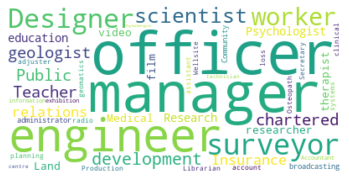

In [48]:
cc_jobs = cc_fraud.drop_duplicates(subset=['full_name']).reset_index(drop=True)

words = []
for phrase in cc_jobs['job'].values:
    for word in phrase.split():
        words.append(word)
jobs_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

wordcloud = WordCloud(background_color='white',
                      collocations=False, contour_width=2,
                     ).generate(jobs_list)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

### Merchant Category

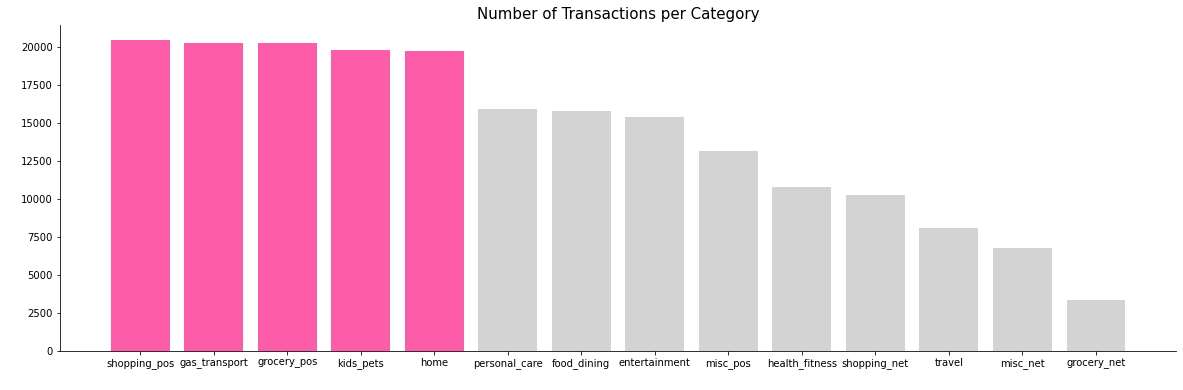

In [61]:
fig, ax = plt.subplots(figsize=(20, 6))

colors_mc = ['lightgray'] * 85
colors_mc[:5] = ['#FD5DA8'] * 5

cc_mc = pd.DataFrame(cc_fraud_eda['category'].value_counts())

ax.bar(cc_mc.index, cc_mc.category, color=colors_mc)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Transactions per Category', size=15, y=1)
plt.show()

In [130]:
# Check  categories for valid transactions done
cc_fraud_eda[cc_fraud_eda['Class'] == 'valid'].groupby(['category'])['Class'].value_counts().sort_values(ascending = False)

category        Class
shopping_pos    valid    20180
gas_transport   valid    20114
grocery_pos     valid    19809
kids_pets       valid    19771
home            valid    19699
personal_care   valid    15862
food_dining     valid    15797
entertainment   valid    15370
misc_pos        valid    13116
health_fitness  valid    10757
shopping_net    valid     9806
travel          valid     8071
misc_net        valid     6516
grocery_net     valid     3337
Name: Class, dtype: int64

In [173]:
# Check  categories for invalid transactions done
cc_cat_invalid = cc_fraud_eda[cc_fraud_eda['Class'] == 'fraud'].groupby(['category'])['Class'].value_counts().sort_values(ascending = False).to_frame()

In [174]:
cc_cat_invalid

,,Class
category,Class,
grocery_pos,fraud,461
shopping_net,fraud,457
misc_net,fraud,278
shopping_pos,fraud,248
gas_transport,fraud,165
entertainment,fraud,35
travel,fraud,32
misc_pos,fraud,31
kids_pets,fraud,24


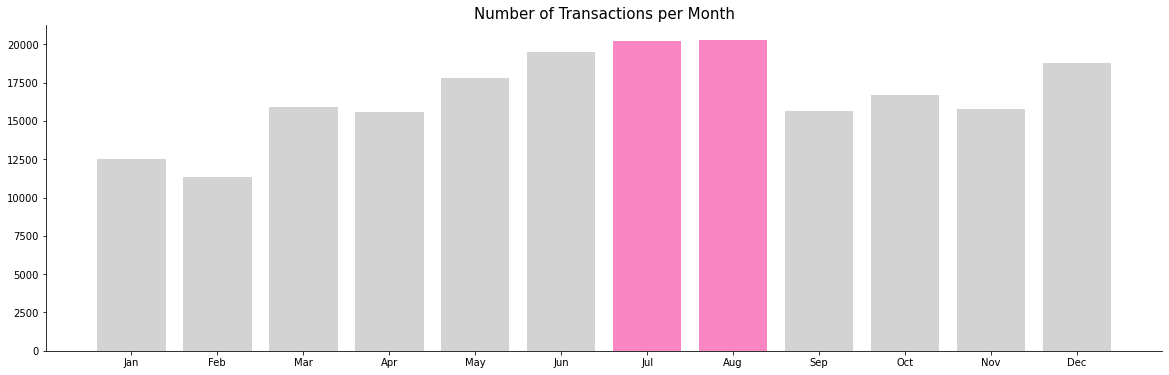

In [62]:
date = pd.DataFrame(cc_fraud_eda['trans_month_'].value_counts()).reset_index().sort_values(['index'])
map_month = cc_fraud_eda.drop_duplicates(['trans_month'])[['trans_month', 'trans_month_']]
map_month.columns = ['trans_month', 'index']
cc_date = map_month.merge(date, on='index').sort_values(['trans_month'])

colors_d = ['lightgray'] * 12
colors_d[6:8] = ['#FA86C4'] * 2

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(cc_date['index'], cc_date.trans_month_, color=colors_d)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Transactions per Month', size=15, y=1)
plt.show()

### Transaction Amount

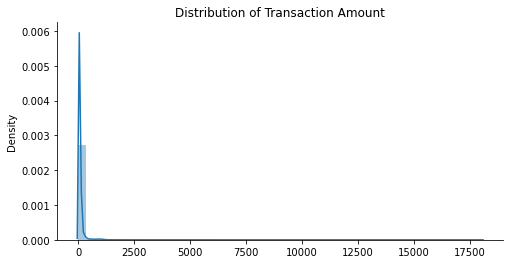

In [64]:
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(cc_fraud_eda['amt'].values, ax=ax)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Distribution of Transaction Amount')
plt.show()

In [110]:
cc_fraud_eda['amt'].value_counts().sort_index(axis=0)

1.00         38
1.01         80
1.02        101
1.03         79
1.04         80
           ... 
14758.51      1
14898.25      1
16513.77      1
16885.21      1
18039.81      1
Name: amt, Length: 25467, dtype: int64

### Monthly Transactions per year

In [118]:
cc_2020 = cc_fraud_eda[cc_fraud_eda['trans_year']=='2020']
cc_2020

,ssn,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_datetime,trans_year,trans_month,trans_day,trans_wday,trans_hour,trans_month_,part_of_day,dob_datetime,age,Class
12,8197-6047393-3,M,Butuan,8.9534,125.5288,337063,Market researcher,1956-12-16,2020-11-11,22:47:04,shopping_pos,932.65,1,Debenhams,8.085698,125.642525,2020-11-11,2020,11,11,Wednesday,22,Nov,early evening,1956-12-16,63,fraud
13,8197-6047393-3,M,Butuan,8.9534,125.5288,337063,Market researcher,1956-12-16,2020-11-11,18:31:20,misc_net,793.75,1,Shopinas,8.345927,125.529768,2020-11-11,2020,11,11,Wednesday,18,Nov,afternoon,1956-12-16,63,fraud
14,8197-6047393-3,M,Butuan,8.9534,125.5288,337063,Market researcher,1956-12-16,2020-11-11,22:19:58,shopping_net,1100.58,1,DealGrocer,9.723431,125.074858,2020-11-11,2020,11,11,Wednesday,22,Nov,early evening,1956-12-16,63,fraud
15,8197-6047393-3,M,Butuan,8.9534,125.5288,337063,Market researcher,1956-12-16,2020-11-12,22:18:15,grocery_pos,290.16,1,Ever Supermarket,9.562319,125.815819,2020-11-12,2020,11,12,Thursday,22,Nov,early evening,1956-12-16,63,fraud
16,8197-6047393-3,M,Butuan,8.9534,125.5288,337063,Market researcher,1956-12-16,2020-11-12,23:12:29,misc_net,773.86,1,Kimstore,9.190852,125.867638,2020-11-12,2020,11,12,Thursday,23,Nov,late evening,1956-12-16,63,fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,0476-2627741-4,M,Mandaluyong City,14.5833,121.0333,386276,Air traffic controller,1958-02-23,2020-06-20,01:56:47,grocery_pos,118.73,0,Rustans Supermarket,14.691833,120.284772,2020-06-20,2020,6,20,Saturday,1,Jun,late evening,1958-02-23,62,valid
199994,0476-2627741-4,M,Mandaluyong City,14.5833,121.0333,386276,Air traffic controller,1958-02-23,2020-05-21,15:17:54,food_dining,85.73,0,Dunkin Brands Group Inc,14.490980,120.338558,2020-05-21,2020,5,21,Thursday,15,May,afternoon,1958-02-23,62,valid
199996,0476-2627741-4,M,Mandaluyong City,14.5833,121.0333,386276,Air traffic controller,1958-02-23,2020-12-23,06:58:31,misc_pos,8.23,0,Bratpack,14.159277,120.498417,2020-12-23,2020,12,23,Wednesday,6,Dec,early morning,1958-02-23,62,valid
199997,0476-2627741-4,M,Mandaluyong City,14.5833,121.0333,386276,Air traffic controller,1958-02-23,2020-03-28,13:29:01,food_dining,26.45,0,The Moment Group,14.341867,120.359051,2020-03-28,2020,3,28,Saturday,13,Mar,midday,1958-02-23,62,valid


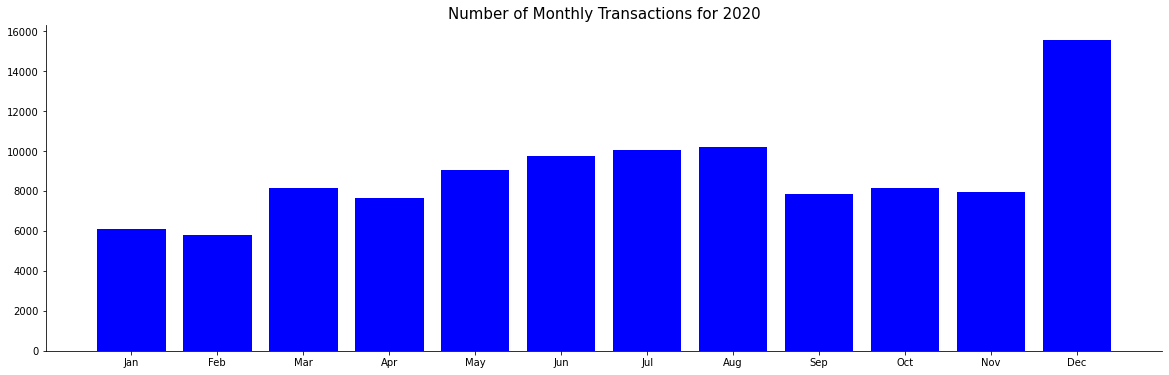

In [120]:
date = pd.DataFrame(cc_2020['trans_month_'].value_counts()).reset_index().sort_values(['index'])
map_month = cc_fraud_eda.drop_duplicates(['trans_month'])[['trans_month', 'trans_month_']]
map_month.columns = ['trans_month', 'index']
cc_date = map_month.merge(date, on='index').sort_values(['trans_month'])

colors_d = ['blue']
# colors_d[6:8] = ['#FA86C4'] * 2

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(cc_date['index'], cc_date.trans_month_, color=colors_d)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Monthly Transactions for 2020', size=15, y=1)
plt.show()

In [121]:
cc_2021 = cc_fraud_eda[cc_fraud_eda['trans_year']=='2021']

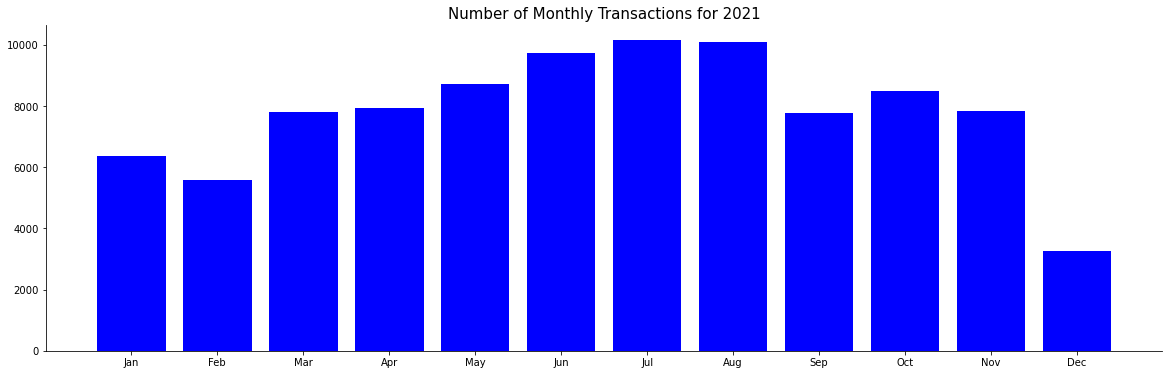

In [122]:
date = pd.DataFrame(cc_2021['trans_month_'].value_counts()).reset_index().sort_values(['index'])
map_month = cc_fraud_eda.drop_duplicates(['trans_month'])[['trans_month', 'trans_month_']]
map_month.columns = ['trans_month', 'index']
cc_date = map_month.merge(date, on='index').sort_values(['trans_month'])

colors_d = ['blue']
# colors_d[6:8] = ['#FA86C4'] * 2

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(cc_date['index'], cc_date.trans_month_, color=colors_d)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Monthly Transactions for 2021', size=15, y=1)
plt.show()

In [123]:
cc_fraud_eda.groupby(['trans_year', 'trans_month', 'trans_month_'])['Class'].value_counts()

trans_year  trans_month  trans_month_  Class
2020        1            Jan           valid     6067
                                       fraud       52
            2            Feb           valid     5696
                                       fraud       87
            3            Mar           valid     8080
                                       fraud       59
            4            Apr           valid     7572
                                       fraud       74
            5            May           valid     8946
                                       fraud       97
            6            Jun           valid     9684
                                       fraud       75
            7            Jul           valid     9966
                                       fraud      104
            8            Aug           valid    10100
                                       fraud       77
            9            Sep           valid     7800
                                     

In [226]:
# daily = cc_fraud_eda.sort_values(['trans_datetime']).reset_index()
# daily.head()
cc_fraud_eda.head()

,ssn,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_datetime,trans_year,trans_month,trans_day,trans_wday,trans_hour,trans_month_,part_of_day,dob_datetime,age,Class
0,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:39:49,misc_net,825.04,1,MedStoreRx,9.265518,123.368859,2021-02-13,2021,2,13,Saturday,22,Feb,early evening,1960-08-31,60,fraud
1,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:01:09,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292,2021-02-12,2021,2,12,Friday,23,Feb,late evening,1960-08-31,60,fraud
2,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,14:45:57,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767,2021-02-12,2021,2,12,Friday,14,Feb,midday,1960-08-31,60,fraud
3,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:08:59,shopping_net,919.50,1,Zalora,10.606020,123.930862,2021-02-12,2021,2,12,Friday,23,Feb,late evening,1960-08-31,60,fraud
4,8013-2690062-6,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:56:43,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528,2021-02-13,2021,2,13,Saturday,22,Feb,early evening,1960-08-31,60,fraud


In [264]:
# by year - amount of transactions
cc_year_trans_sum = pd.DataFrame(cc_fraud_eda.groupby('trans_year')['amt'].sum().sort_values(ascending = True))
cc_year_trans_sum

,amt
trans_year,
2021,6620499.52
2020,7420664.36


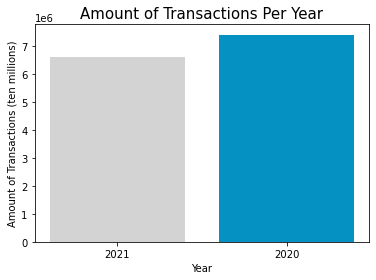

In [268]:
#plot
fig, ax = plt.subplots(figsize=(6, 4))
colors_d = ['lightgray'] * 12
colors_d[1:] = ['#0592C2'] * 2

ax.bar(cc_year_trans_sum.index, cc_year_trans_sum.amt, color = colors_d)
ax.set_title(f'Amount of Transactions Per Year', size=15, y=1)
ax.set_xlabel('Year')
ax.set_ylabel("Amount of Transactions (ten millions)")
plt.show()

Text(0.5, 1.0, 'Number of Transactions per year')

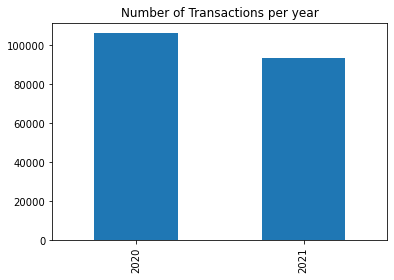

In [278]:
# number of transaction per year
cc_fraud_eda['trans_year'].value_counts().plot(kind='bar')
plt.title('Number of Transactions per year')

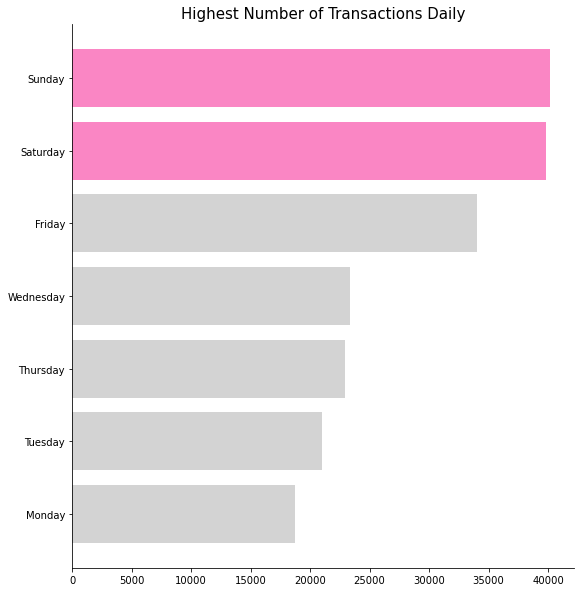

In [227]:
cc_daily = pd.DataFrame({'trans_count':cc_fraud_eda['trans_wday'].value_counts().sort_values()})

colors_h = ['lightgray'] * 7
colors_h[-2:] = ['#FA86C4'] * 2

fig, ax = plt.subplots(figsize=(9, 10))
ax.barh(cc_daily.index, cc_daily.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Highest Number of Transactions Daily', size=15, y=1)
plt.show()

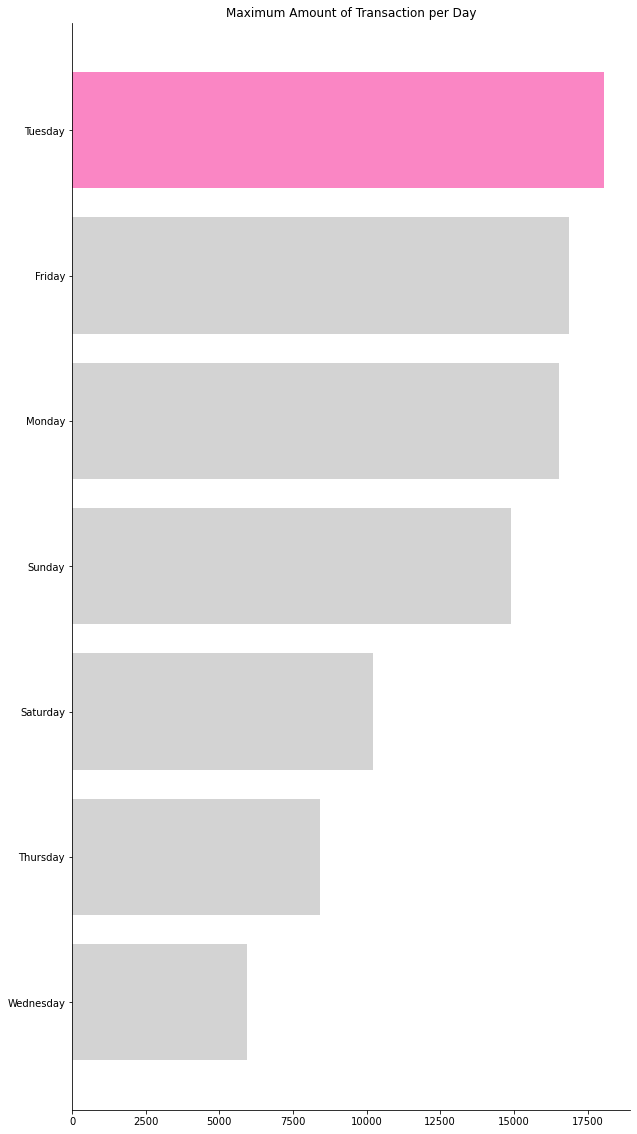

In [234]:
trans_amt_day = cc_fraud_eda.groupby('trans_wday')['amt'].max()
trans_amt_day = trans_amt_day.sort_values()

colors_1 = ['lightgray'] * 7
colors_1[-1:] = ['#FA86C4'] * 1

fig, ax = plt.subplots(figsize=(10,20))
ax.barh(trans_amt_day.index, trans_amt_day, color = colors_1)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
plt.title('Maximum Amount of Transaction per Day')
plt.show()

In [229]:
trans_amt_day

trans_wday
Wednesday     5923.93
Thursday      8418.35
Saturday     10209.97
Sunday       14898.25
Monday       16513.77
Friday       16885.21
Tuesday      18039.81
Name: amt, dtype: float64

In [235]:
cc_fraud_eda['part_of_day'].unique()

array(['early evening', 'late evening', 'midday', 'afternoon',
       'late morning', 'early morning'], dtype=object)

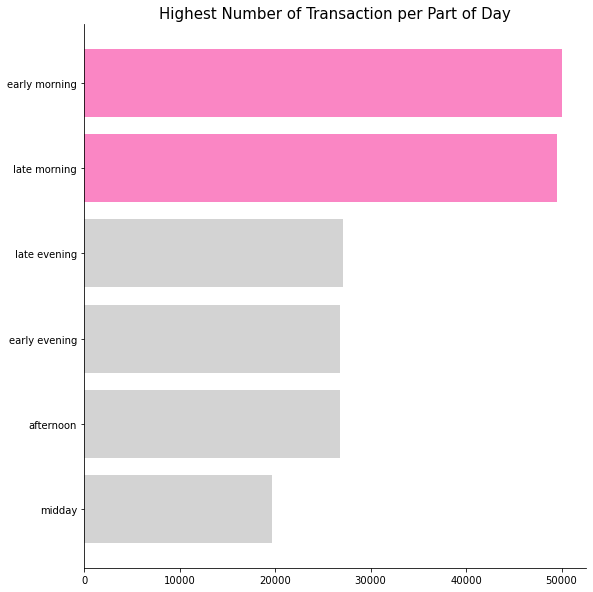

In [239]:
# time of day
cc_part_of_day = pd.DataFrame({'trans_count':cc_fraud_eda['part_of_day'].value_counts().sort_values()})

colors_h = ['lightgray'] * 6
colors_h[-2:] = ['#FA86C4'] * 2

fig, ax = plt.subplots(figsize=(9, 10))
ax.barh(cc_part_of_day.index, cc_part_of_day.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Highest Number of Transaction per Part of Day', size=15, y=1)
plt.show()

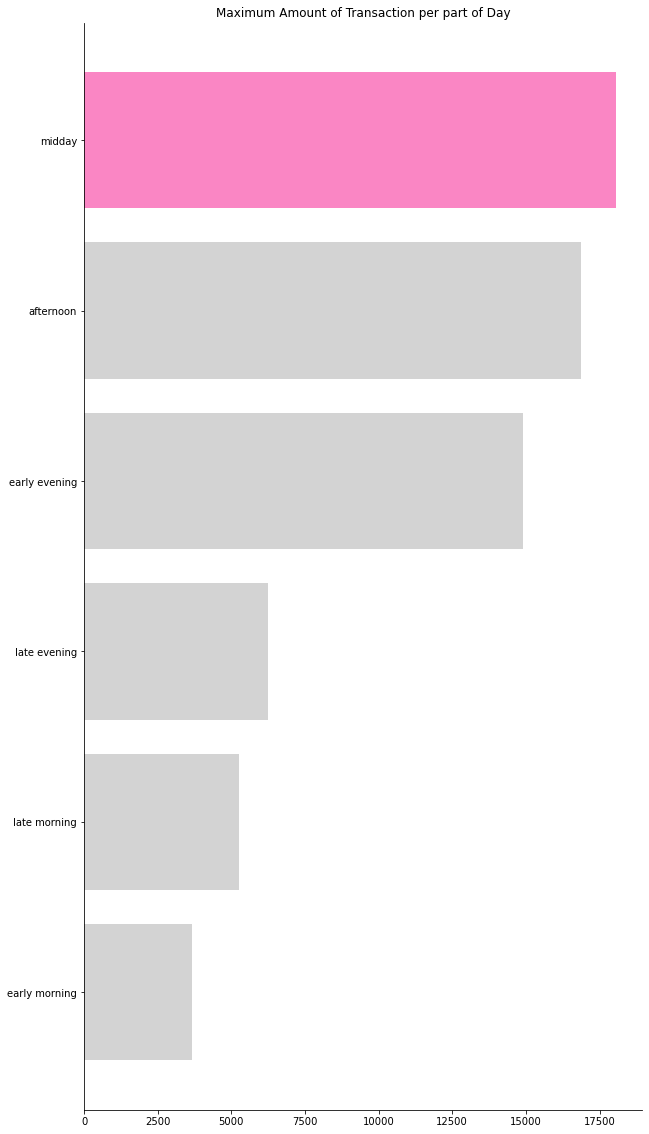

In [250]:
#max amount per part of day

trans_amt__part_day = cc_fraud_eda.groupby('part_of_day')['amt'].max()
trans_amt__part_day = trans_amt__part_day.sort_values()

colors_1 = ['lightgray'] * 6
colors_1[-1:] = ['#FA86C4'] * 1

fig, ax = plt.subplots(figsize=(10,20))
ax.barh(trans_amt__part_day.index, trans_amt__part_day, color = colors_1)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
plt.title('Maximum Amount of Transaction per part of Day')
plt.show()

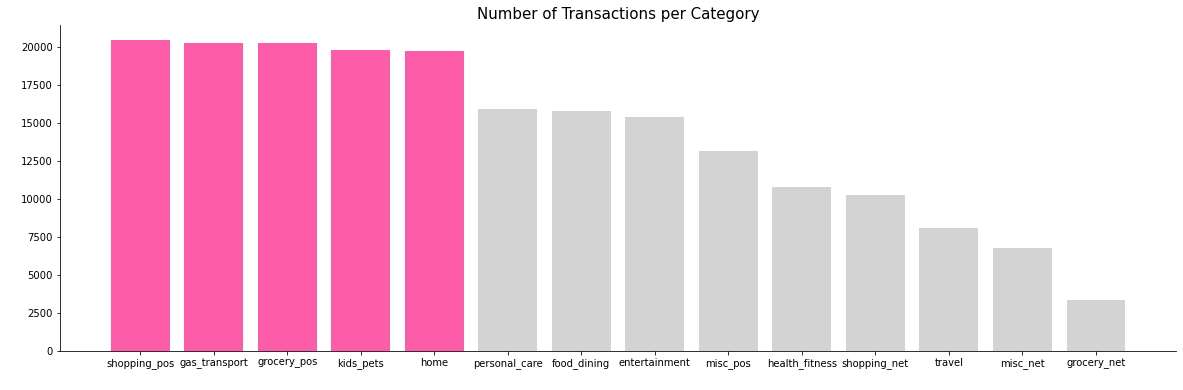

In [251]:
# for reference in relation to part of day
fig, ax = plt.subplots(figsize=(20, 6))

colors_mc = ['lightgray'] * 85
colors_mc[:5] = ['#FD5DA8'] * 5

cc_mc = pd.DataFrame(cc_fraud_eda['category'].value_counts())

ax.bar(cc_mc.index, cc_mc.category, color=colors_mc)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Number of Transactions per Category', size=15, y=1)
plt.show()

In [252]:
# Check which part of the day has the most number of transactions (fraud-1, valid- 0)
cc_fraud_eda[cc_fraud_eda['Class']=='fraud'].groupby(['part_of_day', 'category'])['Class'].value_counts().sort_values(ascending = False)

part_of_day    category        Class
early evening  shopping_net    fraud    210
late evening   shopping_net    fraud    200
               grocery_pos     fraud    192
early morning  grocery_pos     fraud    177
early evening  misc_net        fraud    136
               shopping_pos    fraud    118
late evening   shopping_pos    fraud    106
               misc_net        fraud    105
early morning  gas_transport   fraud     76
late evening   gas_transport   fraud     74
early evening  grocery_pos     fraud     50
late morning   grocery_pos     fraud     25
afternoon      shopping_net    fraud     24
midday         shopping_net    fraud     23
afternoon      misc_net        fraud     22
early evening  misc_pos        fraud     17
late evening   entertainment   fraud     16
early evening  kids_pets       fraud     15
late morning   gas_transport   fraud     15
midday         misc_net        fraud     15
early evening  travel          fraud     14
late evening   personal_care   fraud   

In [ ]:
#check merchants with highest amount of transactions

In [125]:
# Check merchants that has the most number of invalid/fraudulent transactions
cc_fraud_eda[cc_fraud_eda['Class'] == 'fraud'].groupby(['merchant'])['Class'].value_counts().sort_values(ascending = False)[:20]

merchant                       Class
Robinsons Retail Holdings Inc  fraud    42
O Shopping                     fraud    40
SM Retail Inc                  fraud    39
Carousell                      fraud    38
Zalora                         fraud    38
Metro Retail Stores Group      fraud    38
Rustans Supermarket            fraud    38
Landers                        fraud    37
All Day Supermarket            fraud    36
Waltermart Supermarket Inc     fraud    36
Ever Supermarket               fraud    36
Ubuy Co.                       fraud    35
BeautyMNL                      fraud    34
KCC Supermarket                fraud    33
Lazada                         fraud    33
Puregold Price Club Inc        fraud    31
Shopee                         fraud    31
DealGrocer                     fraud    30
Robinsons                      fraud    30
S&R Membership Shopping        fraud    29
Name: Class, dtype: int64

In [128]:
# Check  merchants that has the most number of valid transactions
cc_fraud_eda[cc_fraud_eda['Class'] == 'valid'].groupby(['merchant'])['Class'].value_counts().sort_values(ascending = False)

merchant                       Class
SM Retail Inc                  valid    3985
Robinsons Retail Holdings Inc  valid    3954
Metro Retail Stores Group      valid    2754
Waltermart Supermarket Inc     valid    1530
Landers                        valid    1519
                                        ... 
Metromart                      valid     220
Limon Farms                    valid     217
Savvys                         valid     215
Zagana                         valid     211
SM Markets                     valid     211
Name: Class, Length: 201, dtype: int64

In [288]:
# Check  merchants that has the highest amount of fraud transactions
cc_amt_merch = cc_fraud_eda[cc_fraud_eda['Class'] == 'fraud'].groupby(['merchant'])['amt'].sum().sort_values(ascending = False)[:20]
cc_amt_merch = cc_amt_merch.to_frame()
cc_amt_merch

,amt
merchant,
O Shopping,39828.89
Zalora,38518.03
Carousell,38374.43
Ubuy Co.,34805.16
BeautyMNL,34133.89
Lazada,30245.05
Robinsons,30243.78
Shopee,30098.09
DealGrocer,30070.50


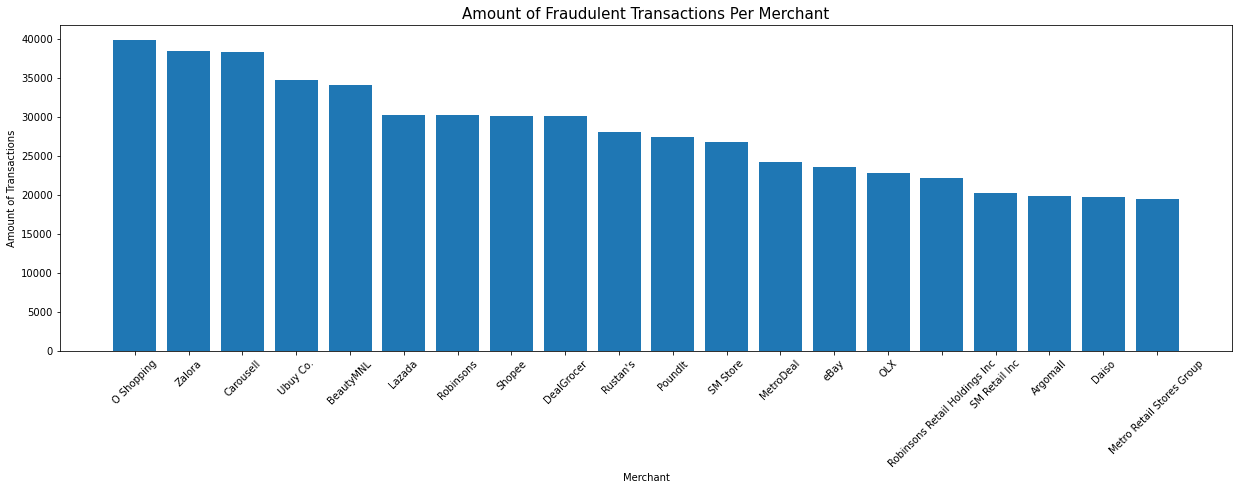

In [301]:
#plot
fig, ax = plt.subplots(figsize=(21, 6))


ax.bar(cc_amt_merch.index, cc_amt_merch.amt)
ax.set_title(f'Amount of Fraudulent Transactions Per Merchant', size=15, y=1)
ax.set_xlabel('Merchant')
ax.set_ylabel("Amount of Transactions")
plt.xticks(rotation= 45)
plt.show()

In [240]:
# Check  categories for invalid transactions done
cc_fraud_eda[cc_fraud_eda['Class'] == 'fraud'].groupby(['category'])['Class'].value_counts().sort_values(ascending = False)

category        Class
grocery_pos     fraud    461
shopping_net    fraud    457
misc_net        fraud    278
shopping_pos    fraud    248
gas_transport   fraud    165
entertainment   fraud     35
travel          fraud     32
misc_pos        fraud     31
kids_pets       fraud     24
grocery_net     fraud     22
personal_care   fraud     22
food_dining     fraud      8
health_fitness  fraud      6
home            fraud      6
Name: Class, dtype: int64

In [310]:
fraud_only = cc_fraud_eda[cc_fraud_eda['Class']=='fraud']

In [114]:
fraud_only.describe()

,lat,long,city_pop,amt,is_fraud,merch_lat,merch_long,trans_month,trans_day,trans_hour,age
count,1795.000000,1795.000000,1.795000e+03,1795.000000,1795.0,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,12.848625,122.135849,4.759977e+05,598.467242,1.0,12.837448,122.125256,6.524791,14.672981,15.755432,64.577716
std,3.083376,1.747594,1.489568e+06,390.088663,0.0,3.141935,1.837460,3.358681,7.861576,9.149618,11.574390
min,6.116700,118.750000,4.104100e+04,6.140000,1.0,5.123365,117.859538,1.000000,1.000000,0.000000,49.000000
25%,10.250000,120.941700,1.348300e+05,288.305000,1.0,10.233457,120.737358,4.000000,8.000000,3.000000,55.000000
50%,14.358300,121.162200,2.831570e+05,758.240000,1.0,13.967035,121.528691,7.000000,13.000000,22.000000,62.000000
75%,14.683300,123.433300,4.165220e+05,954.550000,1.0,15.022205,123.479985,9.000000,21.000000,23.000000,72.000000
max,18.200000,126.233300,2.308800e+07,1364.360000,1.0,19.141866,127.222110,12.000000,31.000000,23.000000,95.000000


In [117]:
fraud_only.shape

(1795, 27)

In [135]:
cc_fraud_eda[cc_fraud_eda['Class'] == 'fraud'].groupby(['dob_datetime'])['Class'].value_counts().sort_values(ascending = False)

dob_datetime  Class
1949-12-05    fraud    20
1963-02-10    fraud    20
1961-09-20    fraud    15
1925-07-21    fraud    12
1964-01-24    fraud    12
                       ..
1967-11-20    fraud     7
1941-05-16    fraud     7
1963-12-06    fraud     7
1942-04-26    fraud     7
1948-11-20    fraud     7
Name: Class, Length: 184, dtype: int64

### Correlation

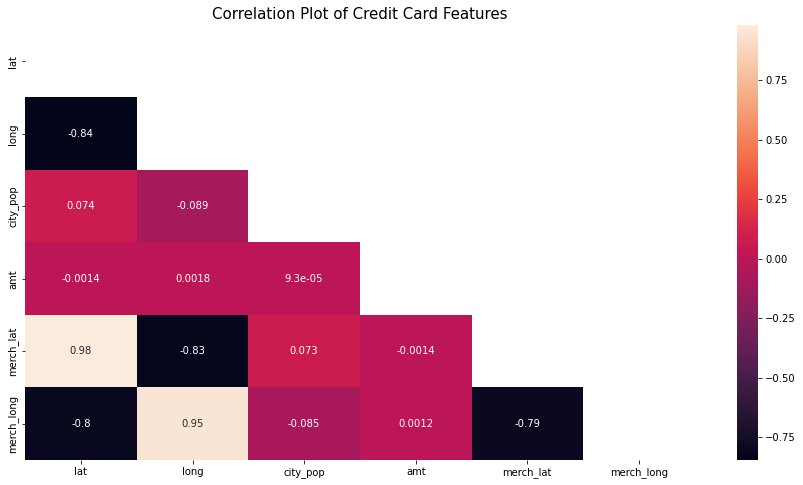

In [65]:
quant = cc_fraud_eda[['lat', 'long', 'city_pop', 'amt', 'merch_lat', 'merch_long']]

corr = quant.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)
ax.set_title("Correlation Plot of Credit Card Features", fontsize=15, y=1)
plt.show()

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Baselining </span></div>

In [66]:
df_target = cc_final['is_fraud']
state_counts = Counter(df_target)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')

num=(df_state[0]/df_state[0].sum())**2
print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

Proportion Chance Criterion: 98.22%
1.25 * Proportion Chance Criterion: 122.78%


<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Exercise </span></div>

We have explored and interpreted some charactertistics of the credit card fraud dataset. Now, it's your turn to generate interesting insights! Here are some of the things that you can explore but feel free to add anything you can think of :)
- What if we group the city per region, what region has the highest number of transactions? valid? fraud? population? transaction amount?
- What year, day of week, time of day has the highest number of transactions? transaction amount?
- What merchant has the highest number of transactions? transaction amount?
- What is the distribution of age? 
- What are the descriptive statistics (mean, max, min) and distribution of the quantitative variables?